### Logistic Regression 

Logistic regression using Neural network on Iris dataset for binary classification.


In [162]:
# Code by Bhavy Kharbanda
# Sap id: 500082531

In [163]:
# Importing the libraries
import sklearn
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np

# Importing the iris dataset from sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [164]:
# Making the object for iris data set and taking the dataset in the iris object
# x contains the data attributes and y contains th etarget variable
iris=load_iris()
X=iris['data']
y=iris['target']

In [165]:
# Printing the iris dataset
print("\nIris dataset: \n")
print(iris)


Iris dataset: 

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2,

In [166]:
print(y)
print(type(y))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
<class 'numpy.ndarray'>


In [167]:
y.shape

(150,)

In [168]:
# Shape is 150 that is the size of the target variable is 150

In [169]:
# Preprocessing the Dataset
scaler=StandardScaler()
X=scaler.fit_transform(X)
X=torch.tensor(X,dtype=torch.float32)
y=torch.tensor(y,dtype=torch.float32)


In [170]:
print(y)
print(type(y))

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2.])
<class 'torch.Tensor'>


In [171]:
# Splitting the dataset in train and test datas, in a ratio of 80:20
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=32)

In [172]:
# Size of the training dataset
X_train.shape

torch.Size([120, 4])

In [173]:
y.shape

torch.Size([150])

In [174]:
# Applying the Logistic regression for the classification of the dataset
class LogisticRegression(nn.Module):
  def __init__(self,n_features,h1):
    super(LogisticRegression,self).__init__()
    self.layer1=nn.Linear(n_features,h1)
    self.layer2=nn.Linear(h1,3)
    self.softmax=nn.Softmax(dim=1)

# using the Relu activation function
  def forward(self,x):
    out=F.relu(self.layer1(x))
    out=F.relu(self.layer2(out))
    out=self.softmax(out)
    return out

#  Softmax function to an n-dimensional input Tensor rescaling them so that the elements of the n-dimensional output Tensor lie in the range [0,1] and sum to 1.

In [175]:
# Training the model for 50 epochs with a batch size = 20
def train(model,X,y,epocs=50,optimizer=None,loss_fn=None,bsz=20,seed=20):
  torch.manual_seed(seed)
  cost=[]
  for epoch in range(epocs):
    suffle_idx=torch.randperm(y.size(0))
    batches =torch.split(suffle_idx,bsz)
    for batch_idx in batches:
      # 1. Compute the output
      yhat=model(X[batch_idx])

      # 2. Compute the error
    
      loss=loss_fn(yhat,y[batch_idx].long())

      # 3. Compute the Gradient
      optimizer.zero_grad()
      loss.backward()

      # 4. Update the Parameters
      optimizer.step()

      # Log the loss
    with torch.no_grad():
      yhat=model(X)
      curr_loss=loss_fn(yhat,y.long())
      print('Epoc:%3d ' % epoch,end="")
      print('BCE %.2f' % curr_loss)
      cost.append(curr_loss)
  return cost

In [176]:
# Using the Adam Optimizer for improving the weights and hence accuracy of the model.
model=LogisticRegression(n_features=X_train.size(1),h1=20)
optimizer=torch.optim.Adam(model.parameters(),lr=.001)
loss_fn=nn.CrossEntropyLoss()

In [177]:
# Calculating the cost/log loss after each epoch
cost =train(model,X_train,y_train,optimizer=optimizer,loss_fn=loss_fn)

Epoc:  0 BCE 1.11
Epoc:  1 BCE 1.11
Epoc:  2 BCE 1.10
Epoc:  3 BCE 1.09
Epoc:  4 BCE 1.09
Epoc:  5 BCE 1.08
Epoc:  6 BCE 1.08
Epoc:  7 BCE 1.07
Epoc:  8 BCE 1.07
Epoc:  9 BCE 1.07
Epoc: 10 BCE 1.06
Epoc: 11 BCE 1.06
Epoc: 12 BCE 1.05
Epoc: 13 BCE 1.05
Epoc: 14 BCE 1.04
Epoc: 15 BCE 1.04
Epoc: 16 BCE 1.04
Epoc: 17 BCE 1.03
Epoc: 18 BCE 1.03
Epoc: 19 BCE 1.02
Epoc: 20 BCE 1.01
Epoc: 21 BCE 1.01
Epoc: 22 BCE 1.00
Epoc: 23 BCE 1.00
Epoc: 24 BCE 0.99
Epoc: 25 BCE 0.99
Epoc: 26 BCE 0.99
Epoc: 27 BCE 0.98
Epoc: 28 BCE 0.98
Epoc: 29 BCE 0.97
Epoc: 30 BCE 0.97
Epoc: 31 BCE 0.96
Epoc: 32 BCE 0.96
Epoc: 33 BCE 0.96
Epoc: 34 BCE 0.95
Epoc: 35 BCE 0.95
Epoc: 36 BCE 0.95
Epoc: 37 BCE 0.94
Epoc: 38 BCE 0.94
Epoc: 39 BCE 0.94
Epoc: 40 BCE 0.93
Epoc: 41 BCE 0.93
Epoc: 42 BCE 0.93
Epoc: 43 BCE 0.92
Epoc: 44 BCE 0.92
Epoc: 45 BCE 0.92
Epoc: 46 BCE 0.92
Epoc: 47 BCE 0.91
Epoc: 48 BCE 0.91
Epoc: 49 BCE 0.91


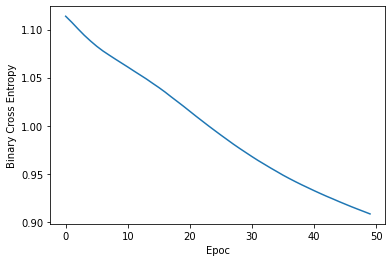

In [178]:
# Plotting the graph between epochs and Binary cross entropy.
# Binary cross entropy is nothing but Log loss as the loss function for the model.
plt.plot(range(len(cost)),cost)
plt.ylabel('Binary Cross Entropy')
plt.xlabel('Epoc')
plt.show()

In [179]:
with torch.no_grad():
  train_pred=model(X_train)
  #train_pred
  train_acc=(torch.argmax(train_pred,dim=1)==y_train).float().mean()
  print('Training Accuracy: %.2f' %train_acc)
  test_pred=model(X_test)
  test_acc=(torch.argmax(test_pred,dim=1)==y_test).float().mean()
  print('Testing Accuracy: %.2f' %test_acc)

Training Accuracy: 0.82
Testing Accuracy: 0.77


### Modifications on the Program

Applying on My dataset

In [180]:
# Importing the datset 
import pandas as pd

data = pd.read_csv ('Forest.csv')
print ("Complete Data set: ")
print(data)

Complete Data set: 
      Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0          2596      51      3                               258   
1          2590      56      2                               212   
2          2804     139      9                               268   
3          2785     155     18                               242   
4          2595      45      2                               153   
...         ...     ...    ...                               ...   
4995       3281     124      7                                30   
4996       3258     122      4                                 0   
4997       3241      52     21                                42   
4998       2979      28     25                               108   
4999       3669      29     24                               105   

      Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                  0                              510   
1                

In [181]:
# Selecting the dataset for X and y
X = data.iloc[:,:-1]
y = data.iloc[:,-1].to_numpy()
print(X.shape)
print(y.shape)

(5000, 10)
(5000,)


In [182]:
# Printing the final dataset
print(X)

      Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0          2596      51      3                               258   
1          2590      56      2                               212   
2          2804     139      9                               268   
3          2785     155     18                               242   
4          2595      45      2                               153   
...         ...     ...    ...                               ...   
4995       3281     124      7                                30   
4996       3258     122      4                                 0   
4997       3241      52     21                                42   
4998       2979      28     25                               108   
4999       3669      29     24                               105   

      Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                  0                              510   
1                                 -6 

In [183]:
print(y)
print(type(y))

[1 1 1 ... 1 1 0]
<class 'numpy.ndarray'>


In [184]:
# Preprocessing the Dataset
scaler=StandardScaler()
X=scaler.fit_transform(X)
X=torch.tensor(X,dtype=torch.float32)
y=torch.tensor(y,dtype=torch.float32)

In [185]:
print(y)
print(type(y))

tensor([1., 1., 1.,  ..., 1., 1., 0.])
<class 'torch.Tensor'>


In [186]:
y.shape

torch.Size([5000])

In [187]:
# Direct function in sklearn to split the dataset
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=.2, random_state=4)
print("Size of training dataset: ")
print(X_train.shape)
print("Size of testing dataset: ")
print(X_test.shape)


Size of training dataset: 
torch.Size([4000, 10])
Size of testing dataset: 
torch.Size([1000, 10])


In [188]:
# Size of the training dataset
X_train.shape

torch.Size([4000, 10])

In [189]:
# Applying the Logistic regression for the classification of the dataset
class LogisticRegression(nn.Module):
  def __init__(self,n_features,h1):
    super(LogisticRegression,self).__init__()
    self.layer1=nn.Linear(n_features,h1)
    self.layer2=nn.Linear(h1,3)
    self.softmax=nn.Softmax(dim=1)

# using the Relu activation function
  def forward(self,x):
    out=F.relu(self.layer1(x))
    out=F.relu(self.layer2(out))
    out=self.softmax(out)
    return out

#  Softmax function to an n-dimensional input Tensor rescaling them so that the elements of the n-dimensional output Tensor lie in the range [0,1] and sum to 1.

In [190]:
# Training the model for 50 epochs with a batch size = 20
def train(model,X,y,epocs=50,optimizer=None,loss_fn=None,bsz=20,seed=20):
  torch.manual_seed(seed)
  cost=[]
  for epoch in range(epocs):
    suffle_idx=torch.randperm(y.size(0))
    batches =torch.split(suffle_idx,bsz)
    for batch_idx in batches:
      # 1. Compute the output
      yhat=model(X[batch_idx])

      # 2. Compute the error
    
      loss=loss_fn(yhat,y[batch_idx].long())

      # 3. Compute the Gradient
      optimizer.zero_grad()
      loss.backward()

      # 4. Update the Parameters
      optimizer.step()

      # Log the loss
    with torch.no_grad():
      yhat=model(X)
      curr_loss=loss_fn(yhat,y.long())
      print('Epoc:%3d ' % epoch,end="")
      print('BCE %.2f' % curr_loss)
      cost.append(curr_loss)
  return cost

In [191]:
# Using the Adam Optimizer for improving the weights and hence accuracy of the model.
model=LogisticRegression(n_features=X_train.size(1),h1=20)
optimizer=torch.optim.Adam(model.parameters(),lr=.001)
loss_fn=nn.CrossEntropyLoss()

In [192]:
# Calculating the cost/log loss after each epoch
cost =train(model,X_train,y_train,optimizer=optimizer,loss_fn=loss_fn)

Epoc:  0 BCE 0.76
Epoc:  1 BCE 0.66
Epoc:  2 BCE 0.64
Epoc:  3 BCE 0.63
Epoc:  4 BCE 0.62
Epoc:  5 BCE 0.62
Epoc:  6 BCE 0.62
Epoc:  7 BCE 0.62
Epoc:  8 BCE 0.61
Epoc:  9 BCE 0.61
Epoc: 10 BCE 0.61
Epoc: 11 BCE 0.61
Epoc: 12 BCE 0.61
Epoc: 13 BCE 0.61
Epoc: 14 BCE 0.61
Epoc: 15 BCE 0.61
Epoc: 16 BCE 0.61
Epoc: 17 BCE 0.61
Epoc: 18 BCE 0.61
Epoc: 19 BCE 0.61
Epoc: 20 BCE 0.61
Epoc: 21 BCE 0.61
Epoc: 22 BCE 0.61
Epoc: 23 BCE 0.60
Epoc: 24 BCE 0.60
Epoc: 25 BCE 0.60
Epoc: 26 BCE 0.60
Epoc: 27 BCE 0.60
Epoc: 28 BCE 0.60
Epoc: 29 BCE 0.60
Epoc: 30 BCE 0.60
Epoc: 31 BCE 0.60
Epoc: 32 BCE 0.60
Epoc: 33 BCE 0.60
Epoc: 34 BCE 0.60
Epoc: 35 BCE 0.60
Epoc: 36 BCE 0.60
Epoc: 37 BCE 0.60
Epoc: 38 BCE 0.60
Epoc: 39 BCE 0.60
Epoc: 40 BCE 0.60
Epoc: 41 BCE 0.60
Epoc: 42 BCE 0.60
Epoc: 43 BCE 0.60
Epoc: 44 BCE 0.60
Epoc: 45 BCE 0.60
Epoc: 46 BCE 0.60
Epoc: 47 BCE 0.60
Epoc: 48 BCE 0.60
Epoc: 49 BCE 0.60


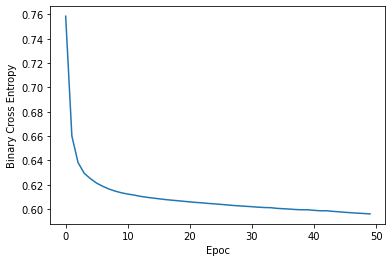

In [193]:
# Plotting the graph between epochs and Binary cross entropy.
# Binary cross entropy is nothing but Log loss as the loss function for the model.
plt.plot(range(len(cost)),cost)
plt.ylabel('Binary Cross Entropy')
plt.xlabel('Epoc')
plt.show()

In [194]:
with torch.no_grad():
  train_pred=model(X_train)
  #train_pred
  train_acc=(torch.argmax(train_pred,dim=1)==y_train).float().mean()
  print('Training Accuracy: %.2f' %train_acc)
  test_pred=model(X_test)
  test_acc=(torch.argmax(test_pred,dim=1)==y_test).float().mean()
  print('Testing Accuracy: %.2f' %test_acc)

Training Accuracy: 0.96
Testing Accuracy: 0.94
